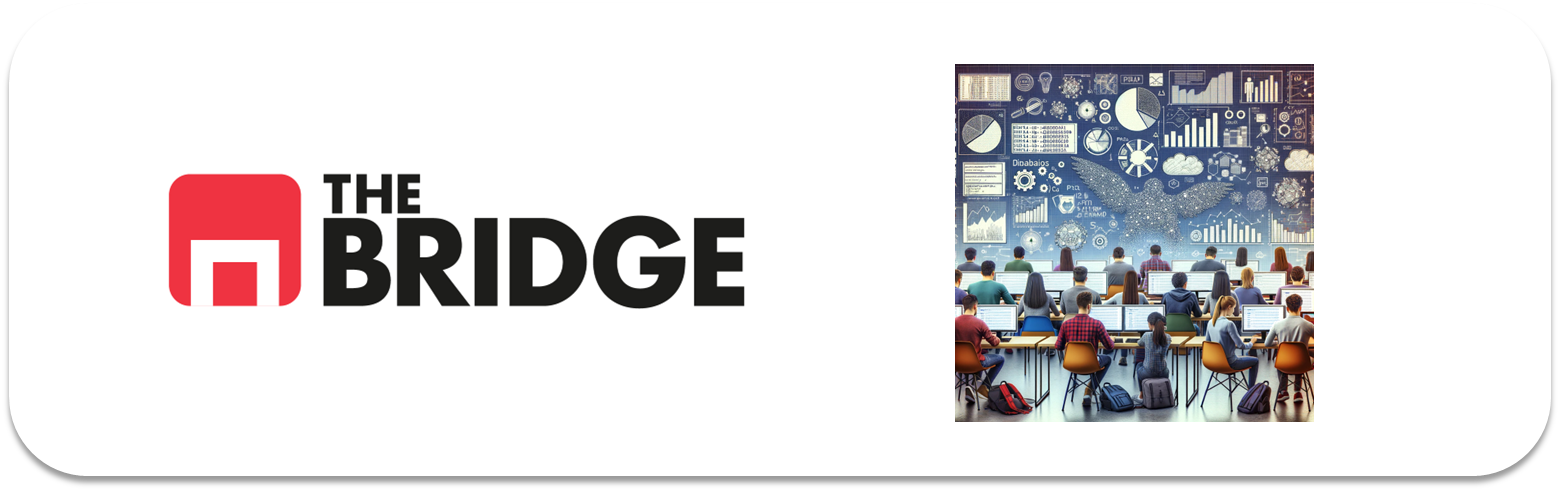

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



### 1. Cargar el dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep="|")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


#### 2. Variable target

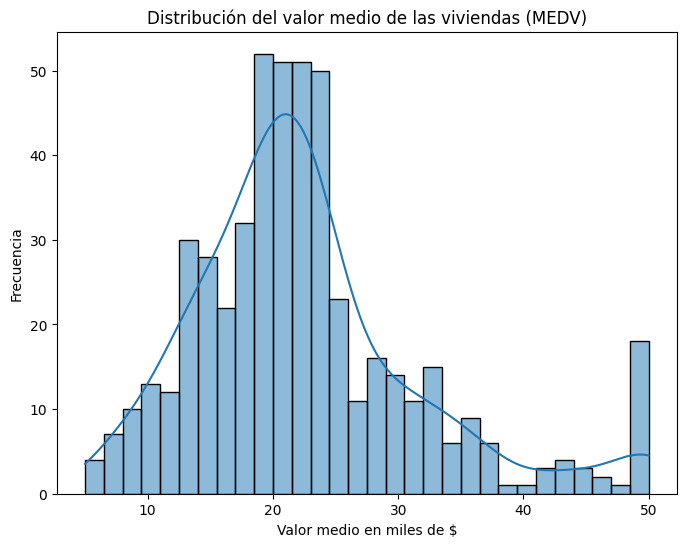

In [4]:
#La variable target es MEDV

plt.figure(figsize=(8,6))
sns.histplot(df['MEDV'], kde=True, bins=30)
plt.title('Distribución del valor medio de las viviendas (MEDV)')
plt.xlabel('Valor medio en miles de $')
plt.ylabel('Frecuencia')
plt.show()

In [5]:
(df['MEDV'] <= 0).sum() 

np.int64(0)

In [6]:
#Hay una acumulación en 50, lo cual sugiere que podría haber un tope artificial --> transformación log

boston = df.copy()
boston['MEDV'] = np.log(df['MEDV'])

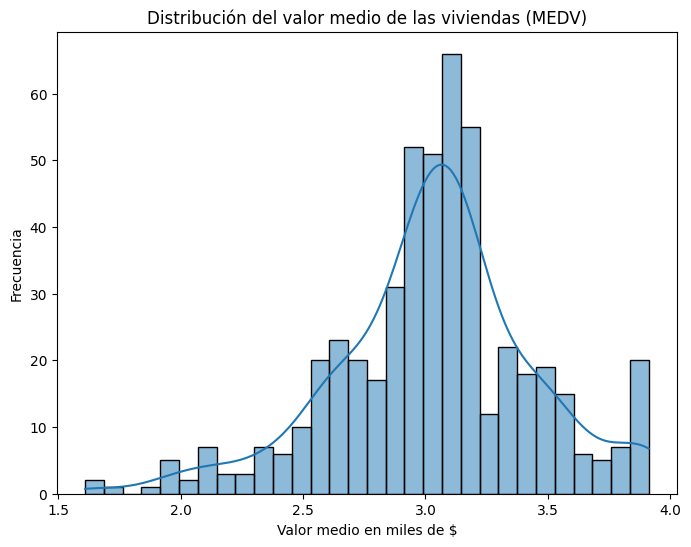

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(boston['MEDV'], kde=True, bins=30)
plt.title('Distribución del valor medio de las viviendas (MEDV)')
plt.xlabel('Valor medio en miles de $')
plt.ylabel('Frecuencia')
plt.show()

#### 3 Y 4. Train, test

In [8]:
from sklearn.model_selection import train_test_split

train_boston, test_boston = train_test_split(boston, test_size=0.2, random_state=42)

In [9]:
X_train = train_boston.drop(columns='MEDV')
y_train = train_boston['MEDV']
X_test = test_boston.drop(columns='MEDV')
y_test = test_boston['MEDV']

#### 5. Selección de features

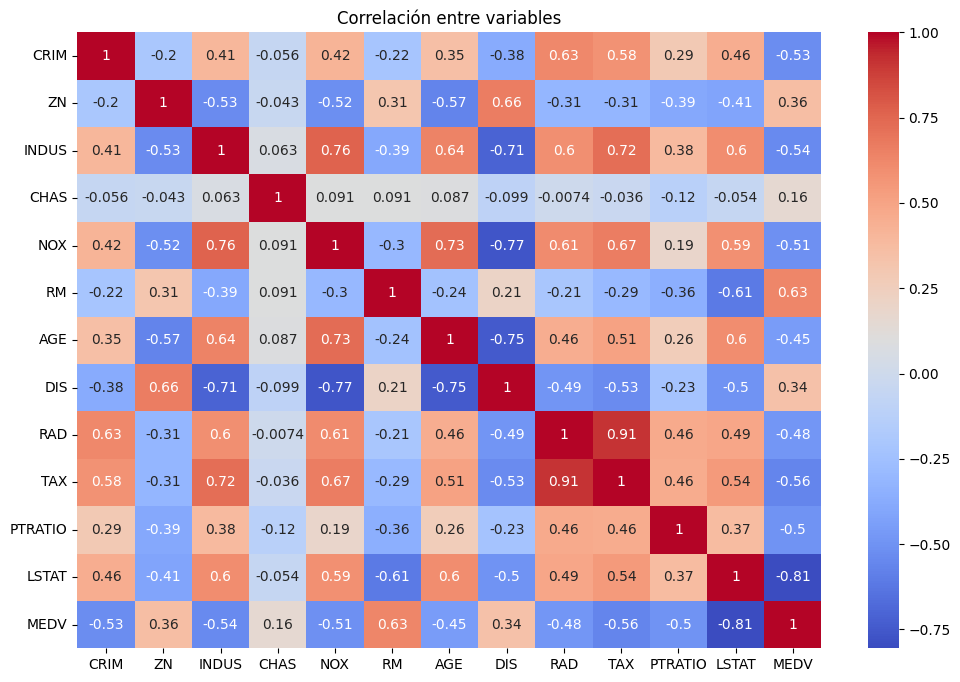

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

In [11]:
features = ['RM', 'ZN', 'DIS', 'PTRATIO', 'NOX', 'CRIM','INDUS', 'TAX', 'LSTAT'] #tienen los valores absolutos más altos

#### 6. Transformar

In [12]:
X_train_sel = X_train[features]
X_test_sel = X_test[features]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

#### 7. Regresión lineal

In [13]:
from sklearn.linear_model import LinearRegression

# Creamos un objeto
lm = LinearRegression()

In [14]:
# Entrenamos con los datos de train
lm.fit(X_train_scaled, y_train)

LinearRegression()

#### 8. Análisis pesos

In [15]:
lm.intercept_

np.float64(3.0451404736725878)

In [23]:
lm.coef_

array([ 0.08367556,  0.01247692, -0.10454914, -0.07380551, -0.07818988,
       -0.08212705,  0.00605844, -0.01614466, -0.21304698])

In [17]:
coef_df = pd.DataFrame(lm.coef_, X_train_sel.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
RM,0.083676
ZN,0.012477
DIS,-0.104549
PTRATIO,-0.073806
NOX,-0.078190
CRIM,-0.082127
INDUS,0.006058
TAX,-0.016145
LSTAT,-0.213047


$$
\hat{y} = 3.05 + 0.08 \cdot \text{RM} + 0.01 \cdot \text{ZN} + -0.10\cdot \text{DIS} - 0.07 \cdot \text{PTRATIO} 
- 0.08 \cdot \text{NOX} - 0.08 \cdot \text{CRIM} + 0.01 \cdot \text{INDUS} - 0.02 \cdot \text{INDUS} - 0.21 \cdot \text{LSTAT}$$

#### 9 y 10. Evaluar y regularizar

In [18]:
from sklearn import  metrics
print("Train MSE:", metrics.mean_squared_error(y_train, lm.predict(X_train_scaled)))
print("Test MSE:", metrics.mean_squared_error(y_test, lm.predict(X_test_scaled)))

Train MSE: 0.03852318991225371
Test MSE: 0.04151953279813544


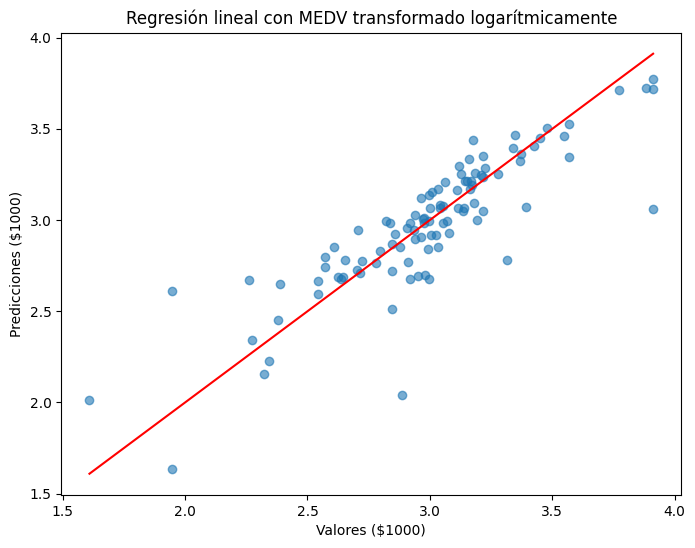

In [19]:
y_pred = lm.predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r')
plt.xlabel("Valores ($1000)")
plt.ylabel("Predicciones ($1000)")
plt.title("Regresión lineal con MEDV transformado logarítmicamente")
plt.show()

In [20]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Valores de alpha que vamos a probar
alphas = [0.01, 1, 10]

# Diccionarios para guardar resultados
resultados = {}

# RIDGE
print("Ridge Regression:\n")
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados[f'Ridge alpha={alpha}'] = (mae, rmse, mse, r2)

    print(f"alpha = {alpha}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.3f}\n")

Ridge Regression:

alpha = 0.01
MAE: 0.14
RMSE: 0.20
MSE: 0.04
R²: 0.734

alpha = 1
MAE: 0.14
RMSE: 0.20
MSE: 0.04
R²: 0.734

alpha = 10
MAE: 0.14
RMSE: 0.20
MSE: 0.04
R²: 0.734



In [21]:
# LASSO
print("Lasso Regression:\n")
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados[f'Lasso alpha={alpha}'] = (mae, rmse, mse, r2)

    print(f"alpha = {alpha}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.3f}\n")

Lasso Regression:

alpha = 0.01
MAE: 0.14
RMSE: 0.21
MSE: 0.04
R²: 0.730

alpha = 1
MAE: 0.28
RMSE: 0.40
MSE: 0.16
R²: -0.018

alpha = 10
MAE: 0.28
RMSE: 0.40
MSE: 0.16
R²: -0.018



In [24]:
tabla_resultados = pd.DataFrame(resultados, index=['MAE', 'RMSE', 'MSE', 'R²']).T
print("\n Comparativa final:")
tabla_resultados.sort_values(by='R²')


 Comparativa final:


,MAE,RMSE,MSE,R²
Lasso alpha=10,0.282431,0.398326,0.158663,-0.017831
Lasso alpha=1,0.282431,0.398326,0.158663,-0.017831
Lasso alpha=0.01,0.135814,0.205118,0.042073,0.730097
Ridge alpha=0.01,0.135839,0.203763,0.041519,0.733652
Ridge alpha=1,0.135739,0.203737,0.041509,0.733721
Ridge alpha=10,0.135182,0.203629,0.041465,0.734002


En el caso de Lasso el mejor alpha = 0.01.

Para Ridge alpha =10.

* Mejor R² (0.734) --> más cercano a 1

* Menor MAE (0.1351)

* Menor RMSE (0.2036)